# Lab 11 - Logistic Regression Continued

The Akimel O'odham people, who were also known as the Pima Indians since European colonization of the US, currently have a high prevalence of diabetes.   The Pima Indian Diabetes dataset contains different possible diabetes indicators and whether the person has diabetes is on [Kaggle](ttps://www.kaggle.com/uciml/pima-indians-diabetes-database) or available [here](http://comet.lehman.cuny.edu/owen/teaching/mat328/diabetes.csv).

Load the dataset into a dataframe called `diabetes`.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from scipy.special import expit
from scipy.stats import logistic

%matplotlib inline


In [4]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Plot a scatter plot of glucose vs. diabetes outcome.

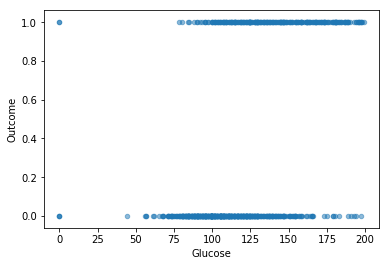

In [6]:
diabetes.plot.scatter(x = "Glucose", y = "Outcome", alpha = 0.5)

Fit a logistic regression model to this data, using Glucose as the independent variable and Outcome as the dependent variable.

In [7]:
logit_model = smf.logit("Outcome ~ Glucose", diabetes).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.526510
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      766
Method:                           MLE   Df Model:                            1
Date:                Thu, 10 Oct 2019   Pseudo R-squ.:                  0.1860
Time:                        17:40:58   Log-Likelihood:                -404.36
converged:                       True   LL-Null:                       -496.74
                                        LLR p-value:                 4.418e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.3501      0.421    -12.713      0.000      -6.175      -4.525
Glucose        0.0379      0.003     11.647      0.000       0.031       0.044
==============================================================================
"""

What is the equation of the logistic regression model?

$$y = \frac{1}{1 + e^{-(-5.3501 + 0.0379x)}}$$


We can also plot the logistic regression model using Seaborn's `regplot()`.  Use `regplot()` as if you were doing linear regression on the variables, but add in the parameter `logistic = True`.

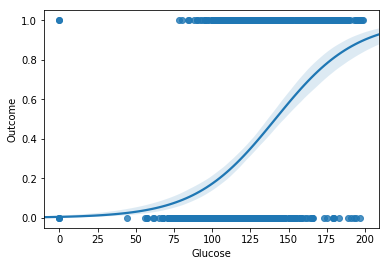

In [9]:
sns.regplot(x = "Glucose", y = "Outcome", data = diabetes, logistic = True)

Let's assess this model by computing the confusion matrix:

In [11]:
confusion_matrix = logit_model.pred_table()
confusion_matrix

array([[443.,  57.],
       [138., 130.]])

What type of errors are most likely?

Compute the sensitivity and specificity of our model:

In [12]:
true_pos = confusion_matrix[0][0]
false_pos = confusion_matrix[1][0]
false_neg = confusion_matrix[0][1]
true_neg = confusion_matrix[1][1]
sensitivity = true_pos/(true_pos + false_neg)
specificity = true_neg/(true_neg + false_pos)

print("Sensitivity:",sensitivity)
print("Specificity:",specificity)

Sensitivity: 0.886
Specificity: 0.48507462686567165


Based on the sensitivity and specificity, what are the strong and weak points of the model?

Remember that by default the confusion matrix uses 0.5 as the cut-off for whether a y value indicates 0  or 1.  We can change that by passing in the new cut-off as a parameter.  For example, to interpret values >= 0.7 as 1 and < 0.7 as 0, use the code:

In [13]:
confusion_matrix = logit_model.pred_table(0.7)
confusion_matrix

array([[484.,  16.],
       [195.,  73.]])

How did the confusion matrix change?  Do you think this new model is better or worse?  Recompute the sensitivity and specificity.

In [14]:
true_pos = confusion_matrix[0][0]
false_pos = confusion_matrix[1][0]
false_neg = confusion_matrix[0][1]
true_neg = confusion_matrix[1][1]
sensitivity = true_pos/(true_pos + false_neg)
specificity = true_neg/(true_neg + false_pos)

print("Sensitivity:",sensitivity)
print("Specificity:",specificity)

Sensitivity: 0.968
Specificity: 0.27238805970149255


How did the sensitivity and specificity change?  Are they better or worse?

### Logistic Regression with Multiple Independent Variables

Let's compute a logistic regression model using all of the columns as independent variables.

Do any of the variables have higher p-values?  If so, let's create a new logistic regression model without those columns.

What's the equation for this logistic regression model?

As before, let's compute the confusion matrix:

Do you think this is an improvement over the model based only on glucose?

Compute the sensitivity and specificity:

How do the sensitivity and specificity compare to the simpler model?  Play around with the cut-off to see what number gives the best results.

### Challenges
- To better understand the data, plot the distributions of the Glucose column for people with diabetes and without diabetes as overlapping histograms.  How does this graph compare to the scatterplot of glucose vs. outcome?  Which gives more information?
- (Very challenging) A *Receiver Operating Characteristic curve* or *ROC curve* gives information about the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) as the cut-off changes.  To plot such a curve, use a loop to compute the true positive rate and false positive rate for multiple cut-offs (eg. 0.1, 0.2, ..., 0.8, 0.9), and plot a line plot of these values with the false positive rate on the x axis and the true positive rate on the y axis.